In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
p = Path("C:/Users/k/Desktop/GitHub/GPS_transport/")

aug_data = pd.read_hdf(p / "processed_data" / "aug_all.h5", key="aug")
segments = pd.read_csv(p / "input_data" / "python" / "segments.csv")
markers = pd.read_csv(p / "input_data" / "python" / "markers.csv")

In [3]:
aug_data = aug_data.loc[:,["segment_id" , "aug_time", "speed"]]
aug_data = aug_data.dropna(subset=["speed"])
aug_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25435205 entries, 0 to 533346
Data columns (total 3 columns):
 #   Column      Non-Null Count     Dtype         
---  ------      --------------     -----         
 0   segment_id  25435205 non-null  uint16        
 1   aug_time    25435205 non-null  datetime64[ns]
 2   speed       25435205 non-null  float64       
dtypes: datetime64[ns](1), float64(1), uint16(1)
memory usage: 630.7 MB


In [4]:
selected_segment_id = np.arange(171,191)
print(f"selected segments are:{selected_segment_id}")
aug_data = aug_data.loc[aug_data["segment_id"].isin(selected_segment_id), ["aug_time","speed","segment_id"]]
aug_data = aug_data.sort_values(["segment_id", "aug_time"]).reset_index(drop=True)

selected segments are:[171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190]


In [5]:
aug_data.loc[aug_data["segment_id"] == selected_segment_id[0]].set_index("aug_time").loc["2019-12-03 19:00:00" : "2019-12-03 23:00:00"]

,speed,segment_id
aug_time,,
2019-12-03 19:00:04.043839931,92.159982,171
2019-12-03 19:00:32.742213249,104.040689,171
2019-12-03 19:00:49.667073250,98.149672,171
2019-12-03 19:02:41.393684864,109.112009,171
2019-12-03 19:02:45.084839344,94.109014,171
...,...,...
2019-12-03 22:40:53.099516392,65.080026,171
2019-12-03 22:43:37.579424858,96.934545,171
2019-12-03 22:45:29.001233101,71.330550,171


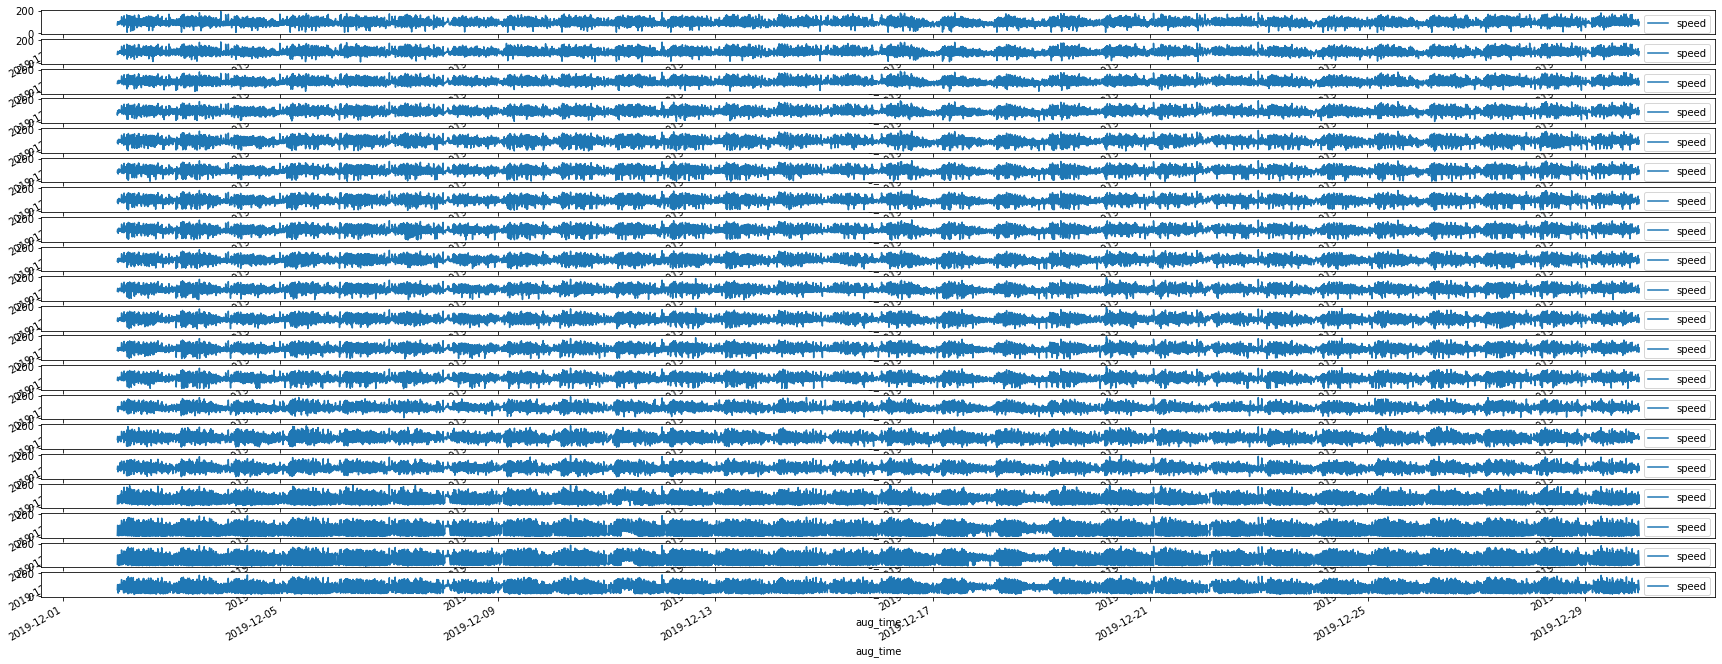

In [6]:
nrows = len(selected_segment_id)

fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in enumerate(axes):
    aug_data[aug_data["segment_id"] == selected_segment_id[i]].set_index("aug_time").plot(ax=ax, y="speed");

In [7]:
# for s_id in selected_segment_id:
#     stationary_check = sm.tsa.stattools.adfuller(aug_data.loc[aug_data["segment_id"] == s_id,"speed"])
#     print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

In [8]:
time_bin = "30T"
aug_data = aug_data.groupby("segment_id").apply(lambda x: x.set_index("aug_time").resample(time_bin)["speed"].mean())
aug_data = aug_data.T
aug_data = aug_data.reset_index()
# aug_data = aug_data.unstack(0)

In [9]:
names = ([f"segment_{i}" for i in selected_segment_id])
names.insert(0, "aug_time")
# names.append("int_based")
aug_data.columns = names

In [10]:
aug_data

,aug_time,segment_171,segment_172,segment_173,segment_174,segment_175,segment_176,segment_177,segment_178,segment_179,...,segment_181,segment_182,segment_183,segment_184,segment_185,segment_186,segment_187,segment_188,segment_189,segment_190
0,2019-12-02 00:00:00,83.852659,84.444037,84.887215,82.163280,84.447452,83.309151,82.866620,82.868687,83.901259,...,83.413491,83.413498,83.259713,74.884148,74.076933,73.883909,53.321607,44.605314,46.351348,67.774430
1,2019-12-02 00:30:00,93.228700,93.555570,95.066312,91.896925,90.813191,90.517213,90.509426,90.509419,90.302149,...,88.562311,88.562313,88.432378,93.103065,83.057962,83.997367,68.898167,52.859060,53.915839,76.279238
2,2019-12-02 01:00:00,94.800015,95.719999,95.455056,95.303419,94.208062,93.987562,93.987564,94.236805,94.628126,...,93.944486,93.944490,93.844982,97.472532,89.854260,89.624976,83.953812,73.915752,73.375745,80.961815
3,2019-12-02 01:30:00,103.255873,104.829597,104.815874,104.640873,104.093447,103.313257,103.061968,103.016068,102.308903,...,102.302020,102.302011,102.511426,104.261388,97.367135,97.391694,89.384566,77.735575,77.487439,93.951432
4,2019-12-02 02:00:00,97.885117,99.273741,99.128848,98.281714,97.893228,97.930357,98.493610,98.493598,98.380775,...,98.186515,98.186507,98.479887,99.619525,104.022807,96.591999,78.587127,68.601842,70.601159,91.584379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,2019-12-29 21:30:00,96.180154,96.660076,97.040097,96.345763,96.379279,95.704549,95.222837,95.240689,95.213030,...,94.365677,94.469405,94.209456,98.691231,106.091956,90.589755,94.452246,93.477148,93.688506,96.324707
1340,2019-12-29 22:00:00,94.689609,96.512177,96.867904,96.596807,96.206059,95.651239,95.304099,95.213367,94.442931,...,94.012923,94.012931,94.382546,96.445980,94.845910,88.973791,90.244197,83.970077,84.724474,87.569106
1341,2019-12-29 22:30:00,90.527197,90.736604,89.119160,88.254205,87.163937,87.555668,86.822190,86.860246,84.420067,...,87.036535,86.962944,87.062664,97.089872,96.009999,85.891337,86.613495,84.236282,97.449713,97.852441
1342,2019-12-29 23:00:00,87.619894,88.840219,88.897446,89.093708,88.852461,87.655178,87.540811,87.424493,86.860483,...,86.389074,86.402745,85.419169,88.233973,93.652130,72.288125,63.204100,46.508143,45.148612,68.293143


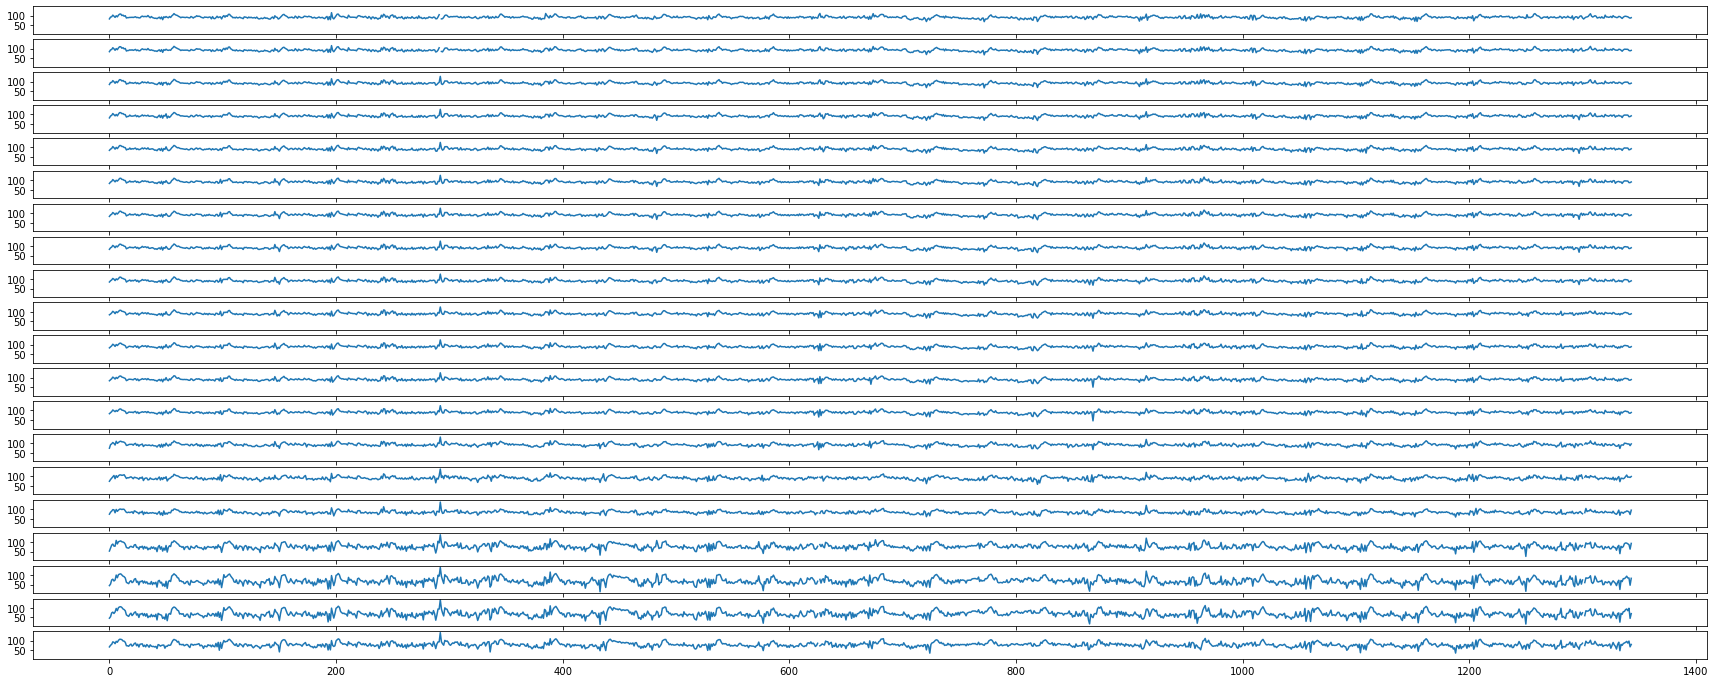

In [11]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax, y="speed");

In [12]:
aug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   aug_time     1344 non-null   datetime64[ns]
 1   segment_171  1343 non-null   float64       
 2   segment_172  1343 non-null   float64       
 3   segment_173  1344 non-null   float64       
 4   segment_174  1344 non-null   float64       
 5   segment_175  1344 non-null   float64       
 6   segment_176  1344 non-null   float64       
 7   segment_177  1344 non-null   float64       
 8   segment_178  1344 non-null   float64       
 9   segment_179  1344 non-null   float64       
 10  segment_180  1344 non-null   float64       
 11  segment_181  1344 non-null   float64       
 12  segment_182  1344 non-null   float64       
 13  segment_183  1344 non-null   float64       
 14  segment_184  1343 non-null   float64       
 15  segment_185  1342 non-null   float64       
 16  segmen

### Segment located in front of ODTU is selected (dir = 2, polatli > ankara)

### Stationary check
#### (p value < significance level) --> reject stationay --> the series is non-stationary

### Agregation on time bins & NaNs

In [13]:
time_1 = dt.time.fromisoformat("20:00:00")
time_2 = dt.time.fromisoformat("06:00:00")
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.time > time_1) | (aug_data["aug_time"].dt.time < time_2))]
aug_data = aug_data.loc[~((aug_data["aug_time"].dt.weekday == 6) | (aug_data["aug_time"].dt.weekday == 5))]

In [14]:
# aug_data["int_based"] = np.arange(0,len(aug_data))
# aug_data = aug_data.reset_index()
aug_data = aug_data.reset_index(drop=True)
print(aug_data.info())
print(aug_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   aug_time     580 non-null    datetime64[ns]
 1   segment_171  580 non-null    float64       
 2   segment_172  580 non-null    float64       
 3   segment_173  580 non-null    float64       
 4   segment_174  580 non-null    float64       
 5   segment_175  580 non-null    float64       
 6   segment_176  580 non-null    float64       
 7   segment_177  580 non-null    float64       
 8   segment_178  580 non-null    float64       
 9   segment_179  580 non-null    float64       
 10  segment_180  580 non-null    float64       
 11  segment_181  580 non-null    float64       
 12  segment_182  580 non-null    float64       
 13  segment_183  580 non-null    float64       
 14  segment_184  580 non-null    float64       
 15  segment_185  580 non-null    float64       
 16  segment_

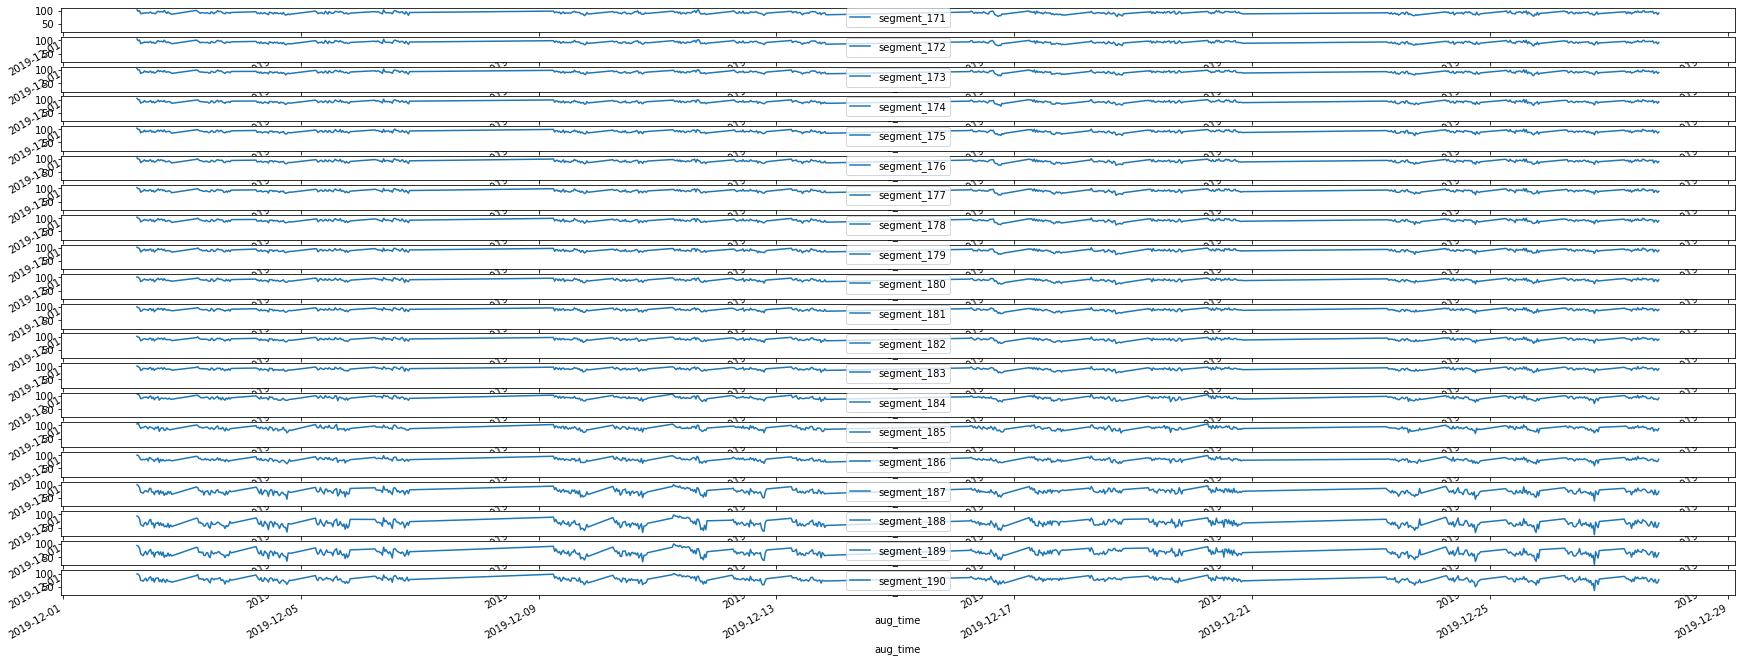

In [15]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data.loc[:, [f"segment_{i}", "aug_time"] ].plot(ax=ax, x="aug_time");

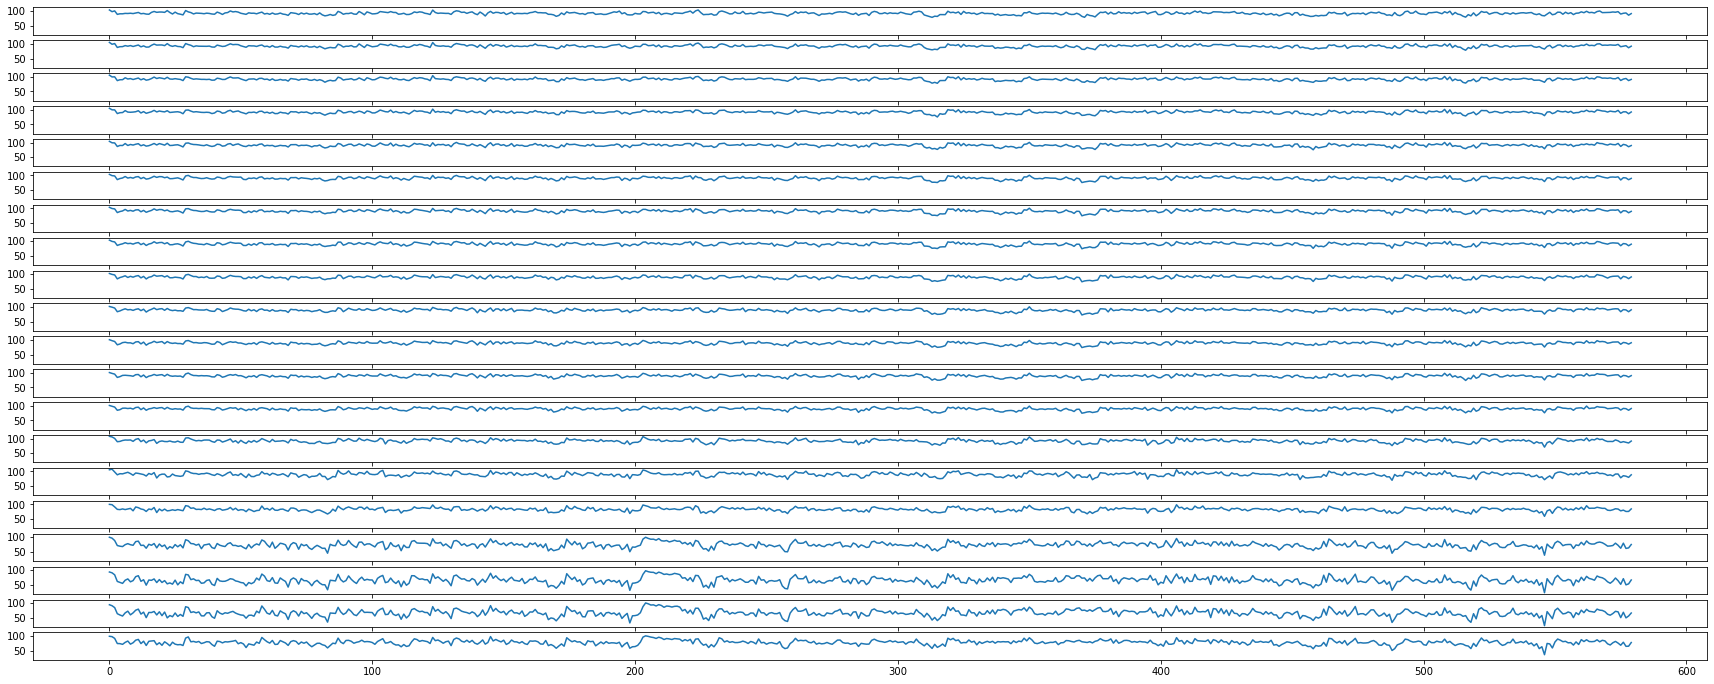

In [16]:
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [17]:
# print(aug_data.loc[aug_data.isna().sum(axis=1) > 1])
aug_data.isna().sum()


aug_time       0
segment_171    0
segment_172    0
segment_173    0
segment_174    0
segment_175    0
segment_176    0
segment_177    0
segment_178    0
segment_179    0
segment_180    0
segment_181    0
segment_182    0
segment_183    0
segment_184    0
segment_185    0
segment_186    0
segment_187    0
segment_188    0
segment_189    0
segment_190    0
dtype: int64

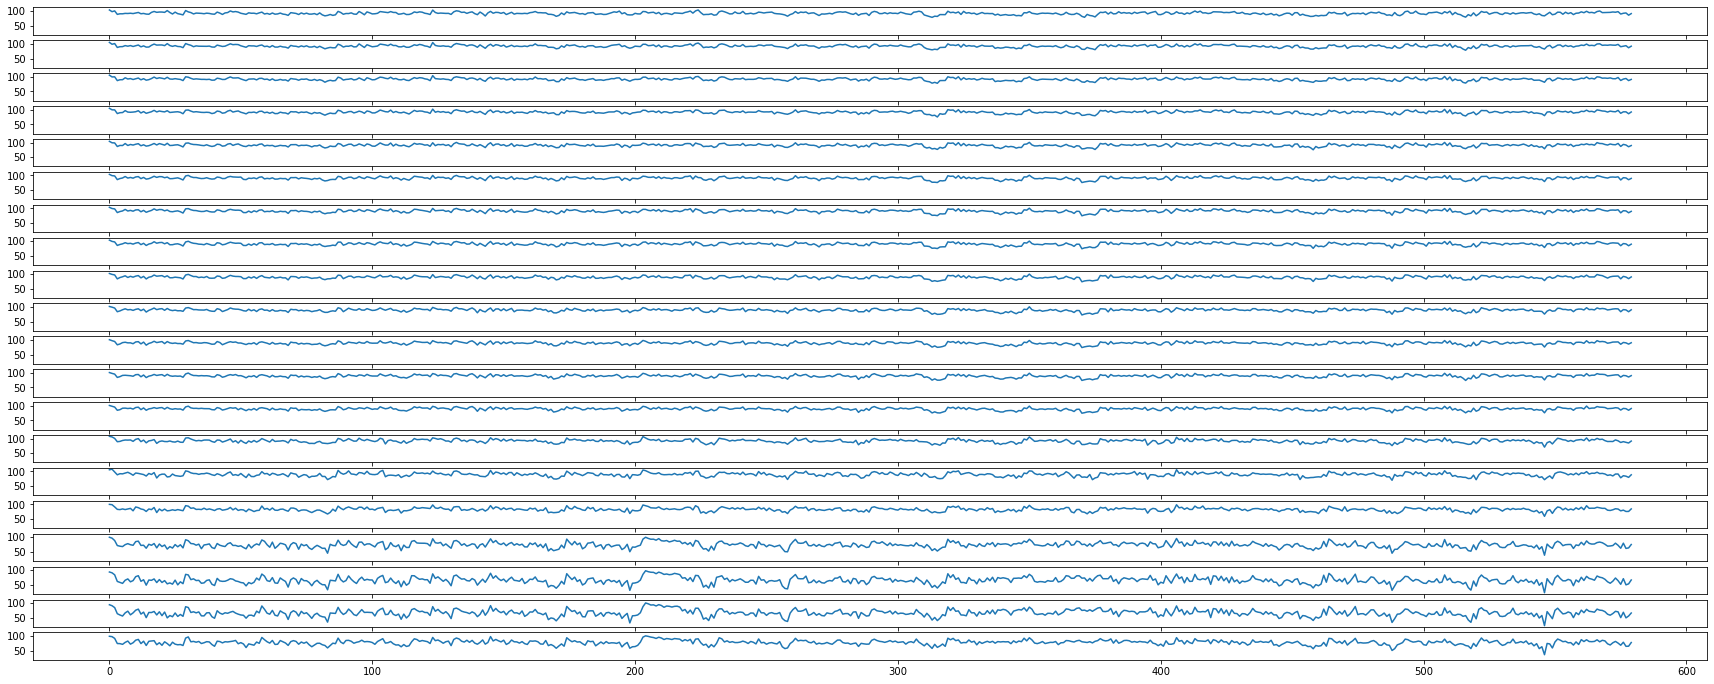

In [18]:
# no need
# aug_data = aug_data.fillna(method="bfill").fillna(method="ffill")
fig, axes = plt.subplots(nrows=nrows, figsize=(30,12), sharey=True)
for i, ax in zip(selected_segment_id,axes):
    aug_data[f"segment_{i}"].plot(ax=ax);

In [19]:
for s_id in selected_segment_id:
    stationary_check = sm.tsa.stattools.adfuller(aug_data[f"segment_{s_id}"])
    print(f"p value is {stationary_check[1]}, segment_id = {s_id} ")

p value is 4.575821941617032e-16, segment_id = 171 
p value is 1.135362284908499e-16, segment_id = 172 
p value is 1.410026124912166e-16, segment_id = 173 
p value is 2.0308989488458576e-16, segment_id = 174 
p value is 4.755551978398806e-16, segment_id = 175 
p value is 8.303982601005889e-17, segment_id = 176 
p value is 6.514340301316423e-17, segment_id = 177 
p value is 4.698824784300094e-17, segment_id = 178 
p value is 8.844812698934326e-17, segment_id = 179 
p value is 2.5802996896464465e-15, segment_id = 180 
p value is 3.61037426234837e-15, segment_id = 181 
p value is 6.615412831380491e-16, segment_id = 182 
p value is 1.074276514219459e-15, segment_id = 183 
p value is 5.172536053205482e-15, segment_id = 184 
p value is 2.459662269436575e-15, segment_id = 185 
p value is 9.352811937794933e-14, segment_id = 186 
p value is 6.1678831120711685e-21, segment_id = 187 
p value is 4.952864146915978e-20, segment_id = 188 
p value is 2.924000126401165e-19, segment_id = 189 
p value is

### Discarding weekend days

#### bir gün 91 datapoint

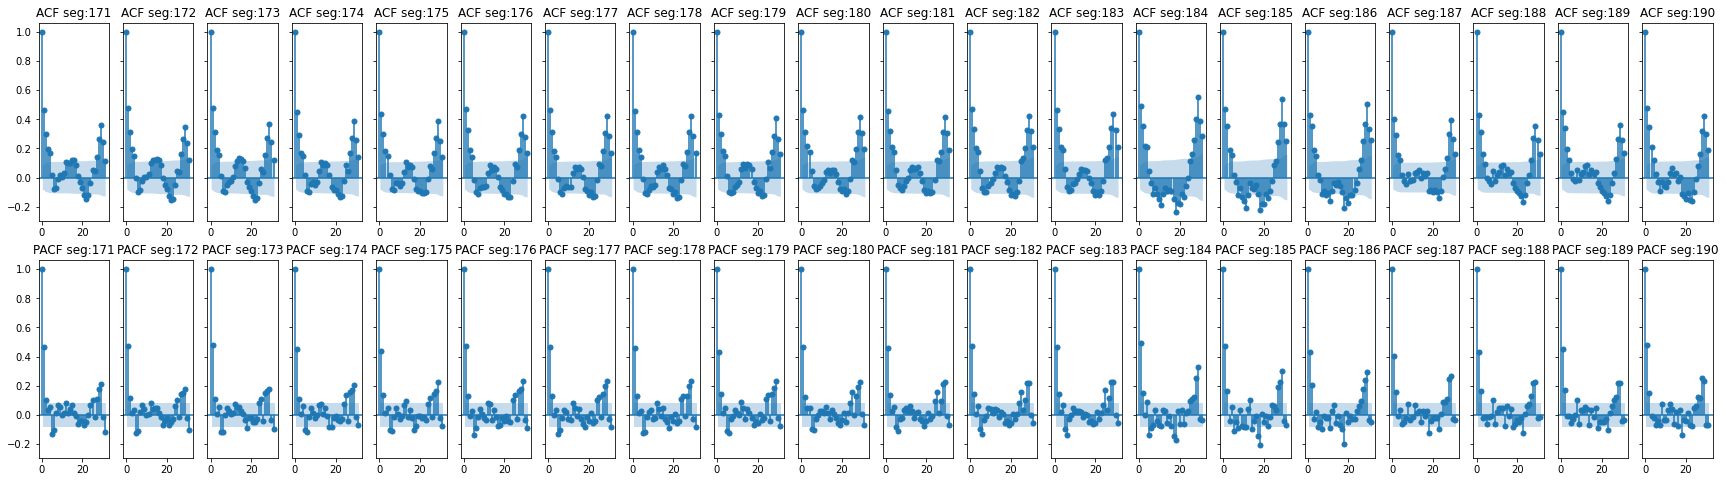

In [20]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"], lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"], lags=lags, ax=ax2, title=f"PACF seg:{i}");

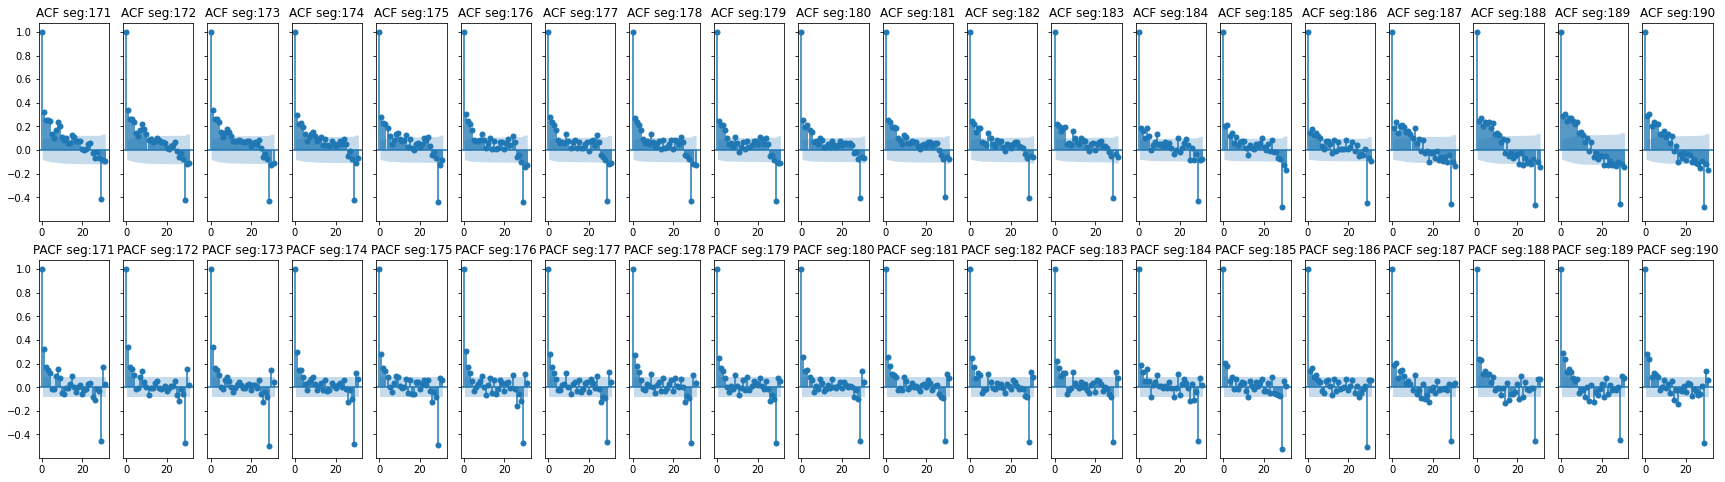

In [21]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff(29).dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff(29).dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

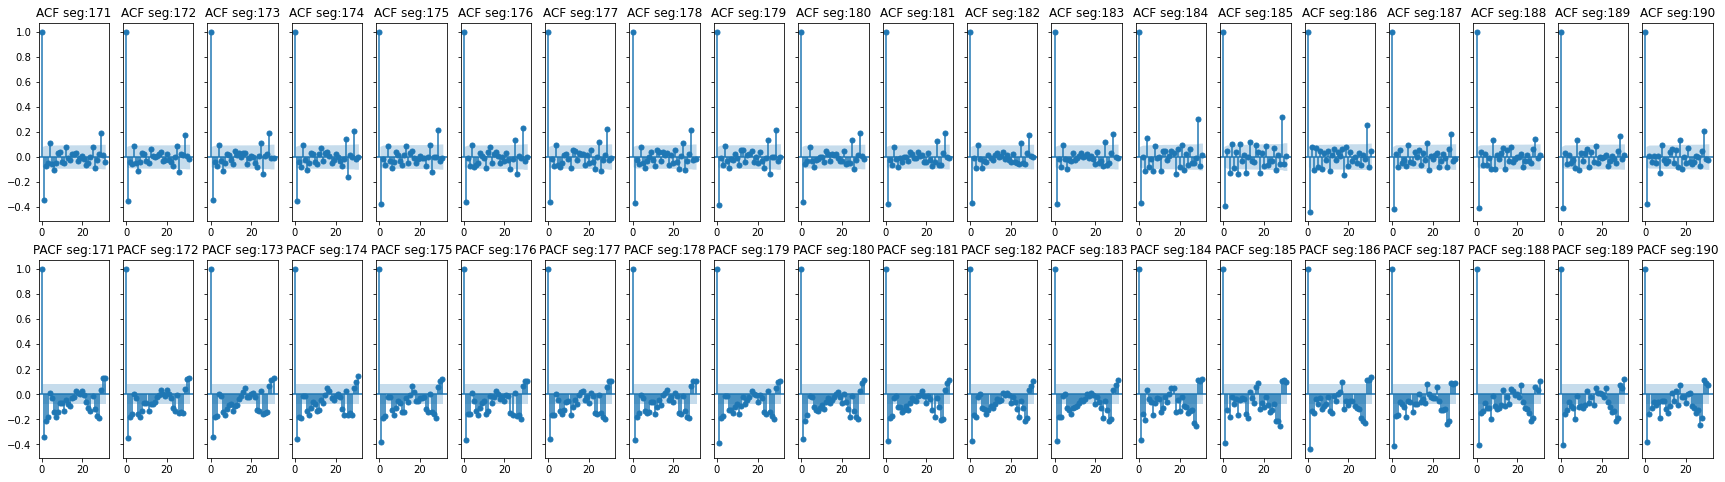

In [22]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

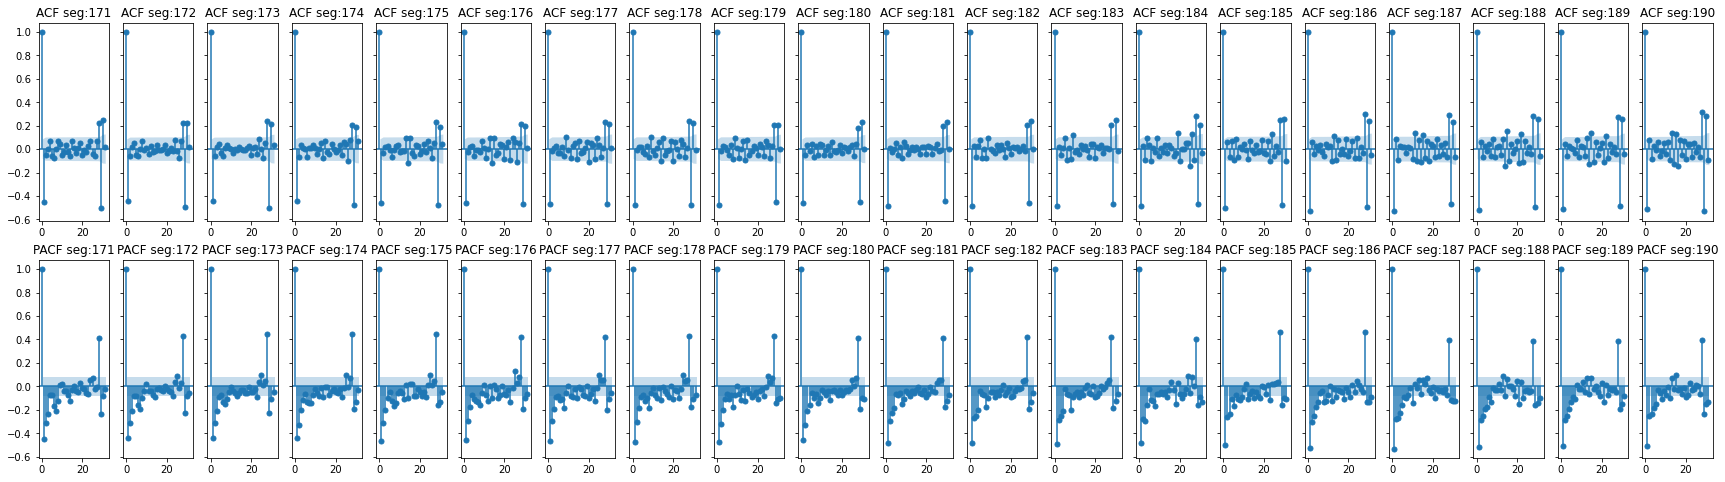

In [46]:
lags=np.arange(0,32,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data[f"segment_{i}"].diff().diff(29).dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data[f"segment_{i}"].diff().diff(29).dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");

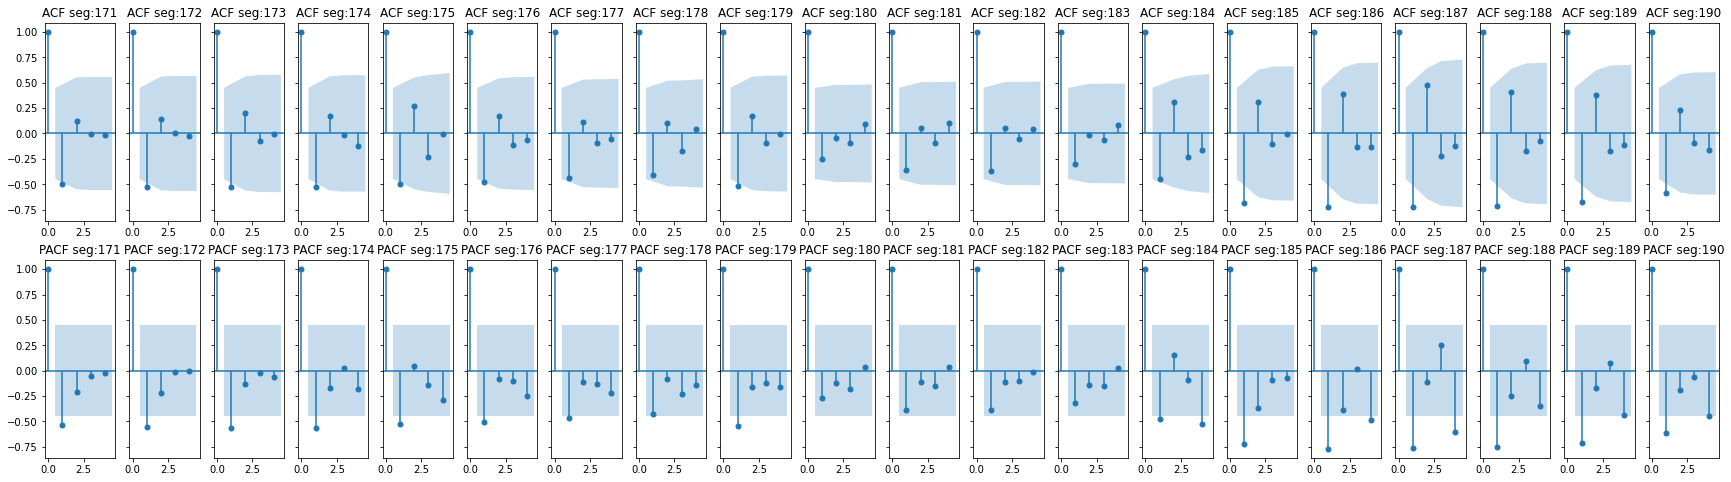

In [24]:
lags=np.arange(0,len(aug_data.iloc[::29,0])/4,1)
fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
for i, ax1, ax2 in zip(selected_segment_id, axes[0], axes[1]):
    sm.graphics.tsa.plot_acf(aug_data.iloc[::29,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax1, title=f"ACF seg:{i}");
    sm.graphics.tsa.plot_pacf(aug_data.iloc[::29,aug_data.columns.get_indexer([f"segment_{i}"])].diff().dropna(), lags=lags, ax=ax2, title=f"PACF seg:{i}");



# fig, axes = plt.subplots(ncols=len(selected_segment_id), nrows=2, figsize=(30,8), sharey=True)
# for i, ax in enumerate(axes[0]):
#     sm.graphics.tsa.plot_acf(aux_data.iloc[::29,i], lags=lags, ax=axes[0][i],title=f"ACF segment:{selected_segment_id[i]}");
#     sm.graphics.tsa.plot_pacf(aux_data.iloc[::29,i], lags=lags, ax=axes[1][i],title=f"PACF segment:{selected_segment_id[i]}");


In [62]:
def get_arima(series, seasonal_lag, p, d, q, sp, sd, sq):
    
    model = sm.tsa.statespace.SARIMAX(series, order=(p, d, q), seasonal_order=(sp,sd,sq,seasonal_lag), trend="c")
    results = model.fit(maxiter=100)
    return p, d, q, sp, sd, sq, results, model

    
def arima_grid(series, seasonal_lag, arima_coef, seasonal_coef):
    
    out = []
    
    input_p, input_d, input_q = arima_coef
    input_sp, input_sd, input_sq = seasonal_coef
    
    for p in input_p:
        for d in input_d:
            for q in input_q:
                for sp in input_sp:
                    for sd in input_sd:
                        for sq in input_sq:
                            result = get_arima(series, seasonal_lag, p, d, q, sp, sd, sq)
                            result = list(result)
                            result.append(result[-2].aic)
                            result.append(result[-3].bic)
                            out.append(result)
    return out

In [26]:
selected_segment_id

array([171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190])

In [47]:
list((1,2,3))

[1, 2, 3]

In [ ]:
seasonal_lag = 29
out = arima_grid(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_171"] ,seasonal_lag, ((3,4,5), (1,), (1,2,3)), ((3,4), (1,), (1,2)))

C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\k\miniconda3\envs\jlab2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\k\miniconda3\envs\jlab2\

In [ ]:
deneme2= pd.DataFrame(out).sort_values(by=8)

In [75]:
deneme1= pd.DataFrame(out).sort_values(by=8)

In [76]:
deneme1

,0,1,2,3,4,5,6,7,8,9
5,1,1,1,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2281.838399,2306.276666
13,2,1,1,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2283.177330,2311.688642
6,1,1,2,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2283.642125,2312.153437
29,4,1,1,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2284.244711,2320.902112
21,3,1,1,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2284.494788,2317.079144
14,2,1,2,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2284.552886,2317.137242
30,4,1,2,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2285.137510,2325.867956
22,3,1,2,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2286.204436,2322.861836
15,2,1,3,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2287.024640,2323.682041
7,1,1,3,1,0,1,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2287.153480,2319.737837


In [68]:
seasonal_lag = 29

p, d, q = 2, 0, 0
sp, sd, sq = 1, 0, 1
results = {}
results["172"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_172"] ,seasonal_lag, 4, 1, 1, 4, 1, 1)
# results["172"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_172"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["173"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_173"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["174"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_174"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["175"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_175"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["176"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_176"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["177"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_177"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["178"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_178"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["179"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_179"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["180"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_180"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["181"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_181"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["182"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_182"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["183"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_183"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["184"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_184"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["185"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_185"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["186"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_186"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["187"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_187"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["188"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_188"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["189"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_189"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)
# results["190"] = get_arima(aug_data.loc[aug_data["aug_time"].dt.isocalendar()["week"] < 52, "segment_190"] ,seasonal_lag, 2, 0, 0, 1, 0, 1)

## do not forget to set seasonal_lag in accordanve with time bin

{'fopt': 2.4511019756661505, 'gopt': array([ 1.46292756e-02,  4.67529127e-05,  5.27911093e-04, -5.73048098e-04,
       -8.71854500e-04, -8.02332423e-05,  9.56781587e-04,  1.11695981e-03,
       -2.70907741e-05,  8.93140317e-04,  1.10554810e-04,  1.63971010e-03]), 'fcalls': 1313, 'warnflag': 0, 'converged': True, 'iterations': 82}


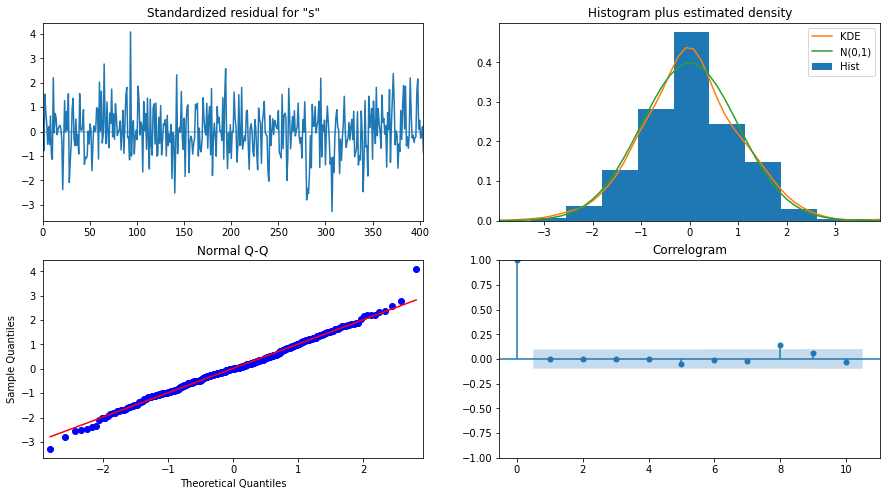

In [70]:
for i in selected_segment_id[[1]]:
    arima_results = results[f"{i}"][-2]
    model = results[f"{i}"][-1]
    print(arima_results.mle_retvals)
    arima_results.plot_diagnostics(figsize=(15,8));

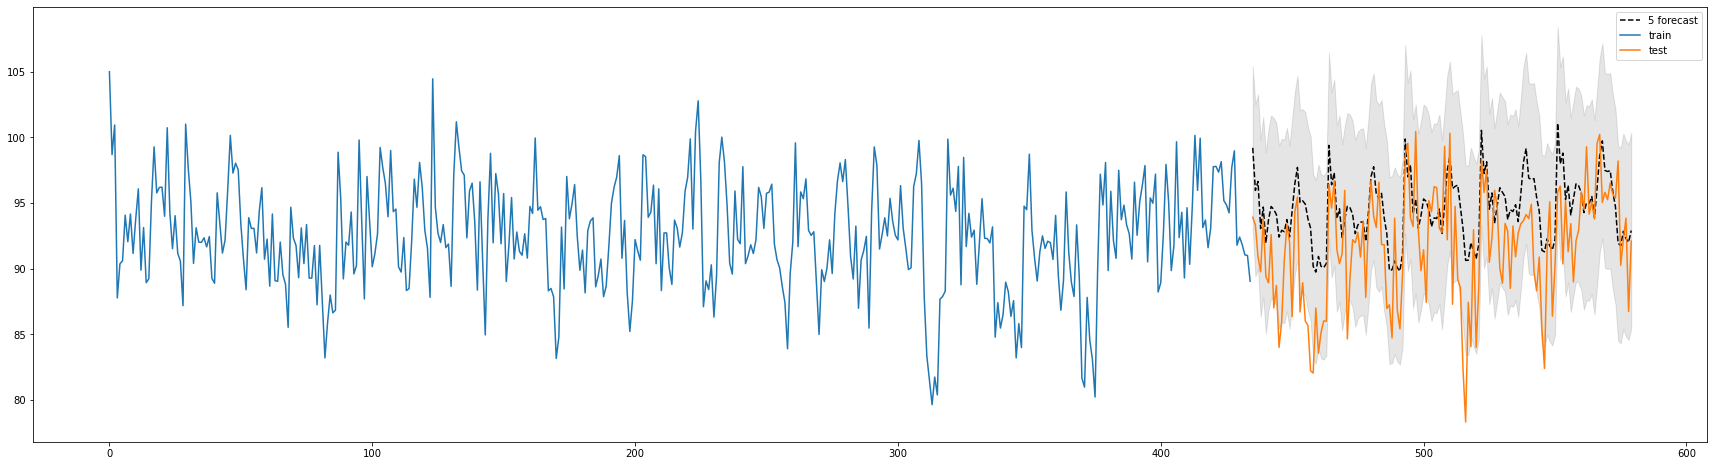

In [71]:
for i in selected_segment_id[[1]]:    
    fcast_all = results[f"{i}"][-2].get_forecast(seasonal_lag * 5).summary_frame(alpha=0.05)

    fig, ax = plt.subplots(figsize=(30, 8))

    fcast_all['mean'].plot(ax=ax, style='k--', label="5 forecast", legend=True)

    aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{i}", ax=ax, label="train", legend=True);
    aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{i}", ax=ax, label="test",legend=True);
    ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='k', alpha=0.1);

In [72]:
prediction = pd.DataFrame()

for i in selected_segment_id[[1]]:
    
    fcast = results[f"{i}"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
    segment_prediction = pd.Series(fcast["mean"])
    dyn_arima_results = results[f"{i}"][-2]
    
    for day in range(1,5):
        dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == day), f"segment_{i}"])
        fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
        segment_prediction = segment_prediction.append(fcast["mean"])
    
    
    segment_prediction = segment_prediction.rename(f"segment_{i}")
    
    prediction = pd.concat([prediction, segment_prediction], axis=1)

In [73]:
prediction

,segment_172
435,99.206577
436,95.963748
437,96.642523
438,93.055901
439,94.696199
...,...
575,88.179228
576,89.580055
577,90.337505
578,88.523838


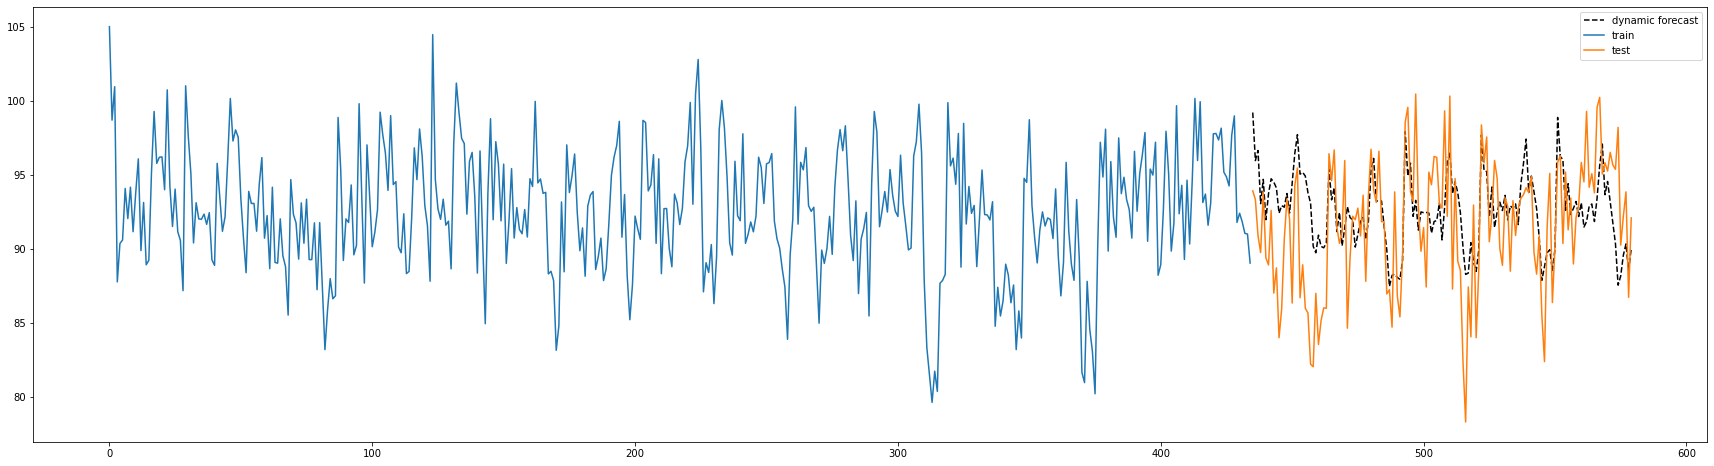

In [74]:
segment_id = 172

fig, ax = plt.subplots(figsize=(30, 8))

prediction.plot(ax=ax, style='k--', label="dynamic forecast", y=f"segment_{segment_id}", legend=True)
aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="train", legend=True);
aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y=f"segment_{segment_id}", ax=ax, label="test",legend=True);


In [111]:
# # one day forecast
# fcast = results[f"48"][-2].get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)

# # collect
# prediction = pd.Series(fcast["mean"])

# #plot
# fig, ax = plt.subplots(figsize=(30, 8))
# fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
# aug_data.iloc[:-seasonal_lag * 5].plot(kind="line", y="segment_48", ax=ax, label="train", legend=True);
# aug_data.iloc[-seasonal_lag * 5:].plot(kind="line", y="segment_48", ax=ax, label="test",legend=True);
# fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
# ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
# ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);

# # copy arima result object
# dyn_arima_results = results[f"48"][-2]

# for i in range(1,5):
#     # append true data to arima model to make dynamic forecast
#     dyn_arima_results = dyn_arima_results.append(aug_data.loc[(aug_data["aug_time"].dt.isocalendar()["week"] == 52) & (aug_data["aug_time"].dt.isocalendar()["day"] == i), "segment_48"])
#     # make 1 day forecast
#     fcast = dyn_arima_results.get_forecast(seasonal_lag * 1).summary_frame(alpha=0.05)
#     #collect
#     prediction = prediction.append(fcast["mean"])
    
#     # plot
#     fig, ax = plt.subplots(figsize=(30, 8))
    
#     fcast['mean'].plot(ax=ax, style='k--', label="1 forecast", legend=True)
#     aug_data.iloc[:-seasonal_lag * 5].plot(kind="line",y="segment_48", ax=ax, label="train", legend=True);
#     aug_data.iloc[-seasonal_lag * 5:].plot(kind="line",y="segment_48", ax=ax, label="test",legend=True);
#     fcast_all['mean'].plot(ax=ax, style='m--', label="5 forecast", legend=True)
#     ax.fill_between(fcast_all.index, fcast_all['mean_ci_lower'], fcast_all['mean_ci_upper'], color='y', alpha=0.1);
#     ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='b', alpha=0.1);
    
# prediction = prediction.rename("segment_48_forecast")

In [130]:
prediction

,segment_48,segment_49,segment_50,segment_51,segment_52,segment_53,segment_54,segment_55,segment_56,segment_57,segment_58,segment_59,segment_60,segment_61,segment_62,segment_63,segment_64,segment_65,segment_66
435,17.828211,23.041930,28.567637,32.004462,42.893754,51.211020,55.930886,59.823922,62.324288,64.475860,66.575381,68.582849,69.978310,71.211487,76.544773,79.268957,77.147462,80.538900,75.590638
436,28.187990,31.020636,34.464169,36.756036,45.530497,52.888369,56.906260,60.190980,62.281101,64.688834,66.893037,68.820850,69.784112,70.537219,74.252091,76.372509,75.727336,78.695566,75.590547
437,59.344116,57.743850,57.144539,55.717926,57.856634,62.151615,64.822621,67.017922,68.914682,71.059009,72.816518,74.141813,74.648833,75.021254,76.824548,77.849386,77.783223,81.005252,79.105332
438,68.147561,65.307955,63.950058,62.204605,62.496037,65.975913,68.066302,69.914641,71.599258,73.815612,75.566146,76.745007,77.282769,77.520846,78.865959,79.967266,80.229204,83.392971,81.110606
439,69.492175,66.504170,64.983521,63.023343,63.883468,66.759066,68.992786,70.842671,72.625882,75.065884,76.915304,78.191158,78.500931,78.697376,79.629573,80.937307,81.796334,84.231583,82.479871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,75.835016,74.831076,74.800034,73.338865,72.805933,73.284736,73.414011,73.359726,73.817968,77.267158,77.369322,77.281744,77.009553,76.967738,77.243439,77.085415,77.839669,81.657959,81.384267
576,75.464912,74.426416,74.177544,72.624448,72.452986,73.305329,73.837642,73.722617,74.033743,77.260653,77.546504,77.848546,77.894858,77.859841,77.865378,78.437576,79.181001,82.782969,82.053975
577,77.840723,76.904474,76.579683,74.567548,74.174667,74.317509,74.872053,74.187593,73.839045,76.374349,76.478747,76.517601,76.262172,76.280709,76.687637,76.804549,78.124722,81.645188,81.937005
578,79.156082,77.500736,77.127130,75.988809,75.645252,76.258444,77.077183,78.041501,78.512696,79.508432,79.842327,80.099059,80.103457,80.229291,80.186727,80.394408,81.133118,84.665159,84.466091


In [133]:
true = aug_data.iloc[-seasonal_lag * 5:,1:]
true

,segment_48,segment_49,segment_50,segment_51,segment_52,segment_53,segment_54,segment_55,segment_56,segment_57,segment_58,segment_59,segment_60,segment_61,segment_62,segment_63,segment_64,segment_65,segment_66
435,22.573927,26.356101,31.139522,34.434552,44.506163,54.005243,58.034570,62.557770,65.574310,67.393593,69.486623,70.493840,70.587358,70.615373,71.004780,69.604738,67.815033,77.271208,75.953313
436,47.777332,47.265460,47.781766,47.892957,52.018804,58.631095,62.002910,65.458168,67.410366,69.857698,71.899092,72.981547,73.382231,73.828130,74.589914,75.386610,76.214316,80.499921,78.564569
437,66.054386,63.435786,62.928759,61.017871,60.565213,64.522995,67.790879,70.603989,72.503160,74.957882,76.624355,77.202556,77.448840,77.513881,78.428683,78.711177,78.725610,83.868220,82.894698
438,69.180647,64.978207,64.007960,61.971563,63.950873,67.985160,70.042749,71.605112,73.107606,75.560248,77.607128,78.532719,78.652984,78.899460,79.215484,79.678206,79.839979,82.023222,80.783477
439,72.622090,68.718193,66.723735,63.789085,63.647952,66.950474,70.238248,71.511915,74.288315,77.355400,79.014870,80.142030,80.362561,80.676659,81.585791,82.460127,82.253333,83.960001,82.002600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,84.162421,80.192593,78.719565,78.709039,77.057090,75.444588,77.198274,77.116022,78.186833,80.825876,81.243138,82.019415,81.737542,81.679846,81.647514,80.627379,81.607526,85.272868,85.646973
576,75.661733,75.484176,76.395440,75.915036,74.508321,76.420908,77.412251,77.231879,77.908558,82.357105,82.497367,82.165189,81.716097,82.527006,82.398723,82.391536,84.198091,88.593951,88.890822
577,79.870487,77.753289,76.461413,75.365525,74.904206,75.941199,76.336926,75.934329,75.619495,78.896273,79.221602,79.196625,79.815084,79.867805,79.127694,79.569486,80.711156,82.313341,81.856099
578,79.027712,77.193817,77.003997,76.883484,75.113299,75.476309,76.419155,77.289385,77.061205,77.844394,78.350901,78.316089,78.618838,79.075224,79.911215,81.412374,82.699151,85.758215,85.430788


In [125]:
# pd.concat([prediction, true], axis=1)

,segment_48_forecast,segment_49_forecast,segment_50_forecast,segment_51_forecast,segment_52_forecast,segment_53_forecast,segment_54_forecast,segment_55_forecast,segment_56_forecast,segment_57_forecast,...,segment_57,segment_58,segment_59,segment_60,segment_61,segment_62,segment_63,segment_64,segment_65,segment_66
435,17.828211,23.041930,28.567637,32.004462,42.893754,51.211020,55.930886,59.823922,62.324288,64.475860,...,67.393593,69.486623,70.493840,70.587358,70.615373,71.004780,69.604738,67.815033,77.271208,75.953313
436,28.187990,31.020636,34.464169,36.756036,45.530497,52.888369,56.906260,60.190980,62.281101,64.688834,...,69.857698,71.899092,72.981547,73.382231,73.828130,74.589914,75.386610,76.214316,80.499921,78.564569
437,59.344116,57.743850,57.144539,55.717926,57.856634,62.151615,64.822621,67.017922,68.914682,71.059009,...,74.957882,76.624355,77.202556,77.448840,77.513881,78.428683,78.711177,78.725610,83.868220,82.894698
438,68.147561,65.307955,63.950058,62.204605,62.496037,65.975913,68.066302,69.914641,71.599258,73.815612,...,75.560248,77.607128,78.532719,78.652984,78.899460,79.215484,79.678206,79.839979,82.023222,80.783477
439,69.492175,66.504170,64.983521,63.023343,63.883468,66.759066,68.992786,70.842671,72.625882,75.065884,...,77.355400,79.014870,80.142030,80.362561,80.676659,81.585791,82.460127,82.253333,83.960001,82.002600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,75.835016,74.831076,74.800034,73.338865,72.805933,73.284736,73.414011,73.359726,73.817968,77.267158,...,80.825876,81.243138,82.019415,81.737542,81.679846,81.647514,80.627379,81.607526,85.272868,85.646973
576,75.464912,74.426416,74.177544,72.624448,72.452986,73.305329,73.837642,73.722617,74.033743,77.260653,...,82.357105,82.497367,82.165189,81.716097,82.527006,82.398723,82.391536,84.198091,88.593951,88.890822
577,77.840723,76.904474,76.579683,74.567548,74.174667,74.317509,74.872053,74.187593,73.839045,76.374349,...,78.896273,79.221602,79.196625,79.815084,79.867805,79.127694,79.569486,80.711156,82.313341,81.856099
578,79.156082,77.500736,77.127130,75.988809,75.645252,76.258444,77.077183,78.041501,78.512696,79.508432,...,77.844394,78.350901,78.316089,78.618838,79.075224,79.911215,81.412374,82.699151,85.758215,85.430788


In [145]:
error_df = pd.DataFrame(((true - prediction)/true).abs().mean())
error_df.columns = ["mape"]
error_df["rmse"] = np.sqrt((((true - prediction) ** 2).mean()))
error_df


,mape,rmse
segment_48,0.165160,8.630853
segment_49,0.134006,7.320089
segment_50,0.106729,6.253821
segment_51,0.083393,5.053448
segment_52,0.055847,3.771786
segment_53,0.047373,3.373397
segment_54,0.047443,3.512766
segment_55,0.049812,3.740888
segment_56,0.052017,3.996996
segment_57,0.051135,4.036653


In [49]:
# fig, ax = plt.subplots(figsize=(30, 8))
# dyn_arima_results.fittedvalues.iloc[-seasonal_lag * 5:].plot(ax=ax, style='k--', label="dynamic forecast day-by-day", legend=True)
# aux_data.iloc[:-seasonal_lag * 5].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="train", legend=True);
# aux_data.iloc[-seasonal_lag * 5:].plot(kind="line", x="int_based", y="segment_12", ax=ax, label="test",legend=True);


    

In [51]:
# dyn_arima_results.model.data.orig_endog